In [1]:
!pip install pandas --upgrade

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.3)


In [2]:
!pip install fastai --upgrade -q

from fastai.vision.all import *
from google.colab import drive

     |████████████████████████████████| 194kB 4.3MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 


/usr/local/lib/python3.6/dist-packages/fastcore/foundation.py:51: UserWarning: `patch_property` is deprecated and will be removed; use `patch(as_prop=True)` instead
  warnings.warn("`patch_property` is deprecated and will be removed; use `patch(as_prop=True)` instead")


In [34]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!ls '/content/'
!tar -xvf "/content/gdrive/My Drive/subs.tar.gz"

In [6]:
!ls '/content/subs'

aww  DunderMifflin  earthporn  food  sports


In [7]:
path = Path('/content/subs')
fnames = get_image_files(path)
print(f"Total Images:{len(fnames)}")
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func)

Total Images:2027


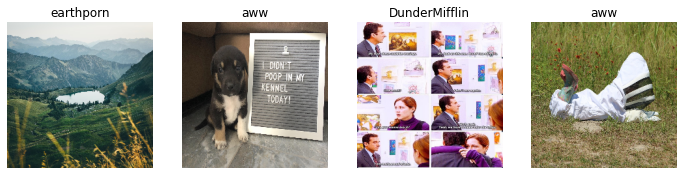

In [8]:
dls.valid.show_batch(max_n=4, nrows=1)

In [15]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Minimum/10: 6.92e-03, steepest point: 7.59e-05


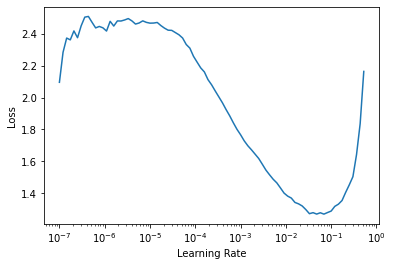

In [16]:
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [17]:
learn.fine_tune(8, base_lr=1.0e-04)

epoch,train_loss,valid_loss,error_rate,time
0,1.903167,0.624495,0.229630,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.899817,0.512791,0.180247,00:17
1,0.793737,0.448082,0.167901,00:17
2,0.680522,0.417702,0.155556,00:17
3,0.586217,0.393885,0.140741,00:17
4,0.510279,0.388304,0.148148,00:17
5,0.466911,0.399429,0.145679,00:17
6,0.433449,0.389228,0.140741,00:17
7,0.408898,0.382580,0.143210,00:18


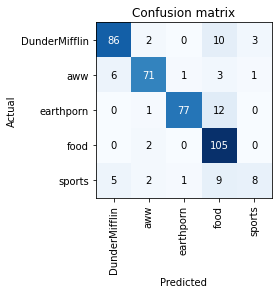

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

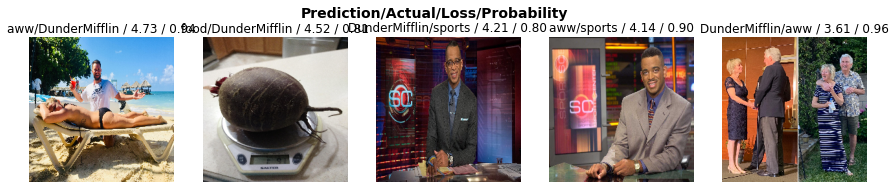

In [19]:
interp.plot_top_losses(5, nrows=1)

In [20]:
learn.export()

In [21]:
path.ls(file_exts='.pkl')

(#1) [Path('/content/subs/export.pkl')]

In [26]:
learn_inf = load_learner(path/'export.pkl')

In [27]:
learn_inf.dls.vocab

(#5) ['DunderMifflin','aww','earthporn','food','sports']

In [45]:
!ls "/content/gdrive/My Drive/"

 2Final.mp4	    GateCrash.tar.gz	       pong-codeB
 Backup		    Holder		      'Python 100'
'Colab Notebooks'  'NN images'		       skyemma.jpg
 Data2.tar.gz	   'onXmaps Web App (1).pdf'  'Student Projects'
 Data.tar.gz	   'onXmaps Web App (2).pdf'   subs.tar.gz
'Deep Learning'    'onXmaps Web App (3).pdf'  'Untitled map.gmap'
'Fall Guys.docx'   'onXmaps Web App.pdf'      'Video Sources'


In [46]:
learn_inf.predict('/content/gdrive/My Drive/skyemma.jpg')

('DunderMifflin', tensor(0), tensor([0.9149, 0.0053, 0.0772, 0.0015, 0.0010]))